In [1]:
%%HTML
<style>
    body {
        --vscode-font-family: "Noto Serif"
    }
</style>

# Understanding the Data

In [2]:
import os
import tarfile 
from six.moves import urllib 
import pandas as pd

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"


def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

upon calling the function `fetch_housing_data()`, it
1. creates datasets/housing directory
2. downloads housing.tgz
3. extracts housing.csv in the directory

In [3]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
fetch_housing_data() # get the csv

housing = load_housing_data() # load it
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# examine the ocean_proximity column

housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
housing.describe() # describes the summary of numerical attributes

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


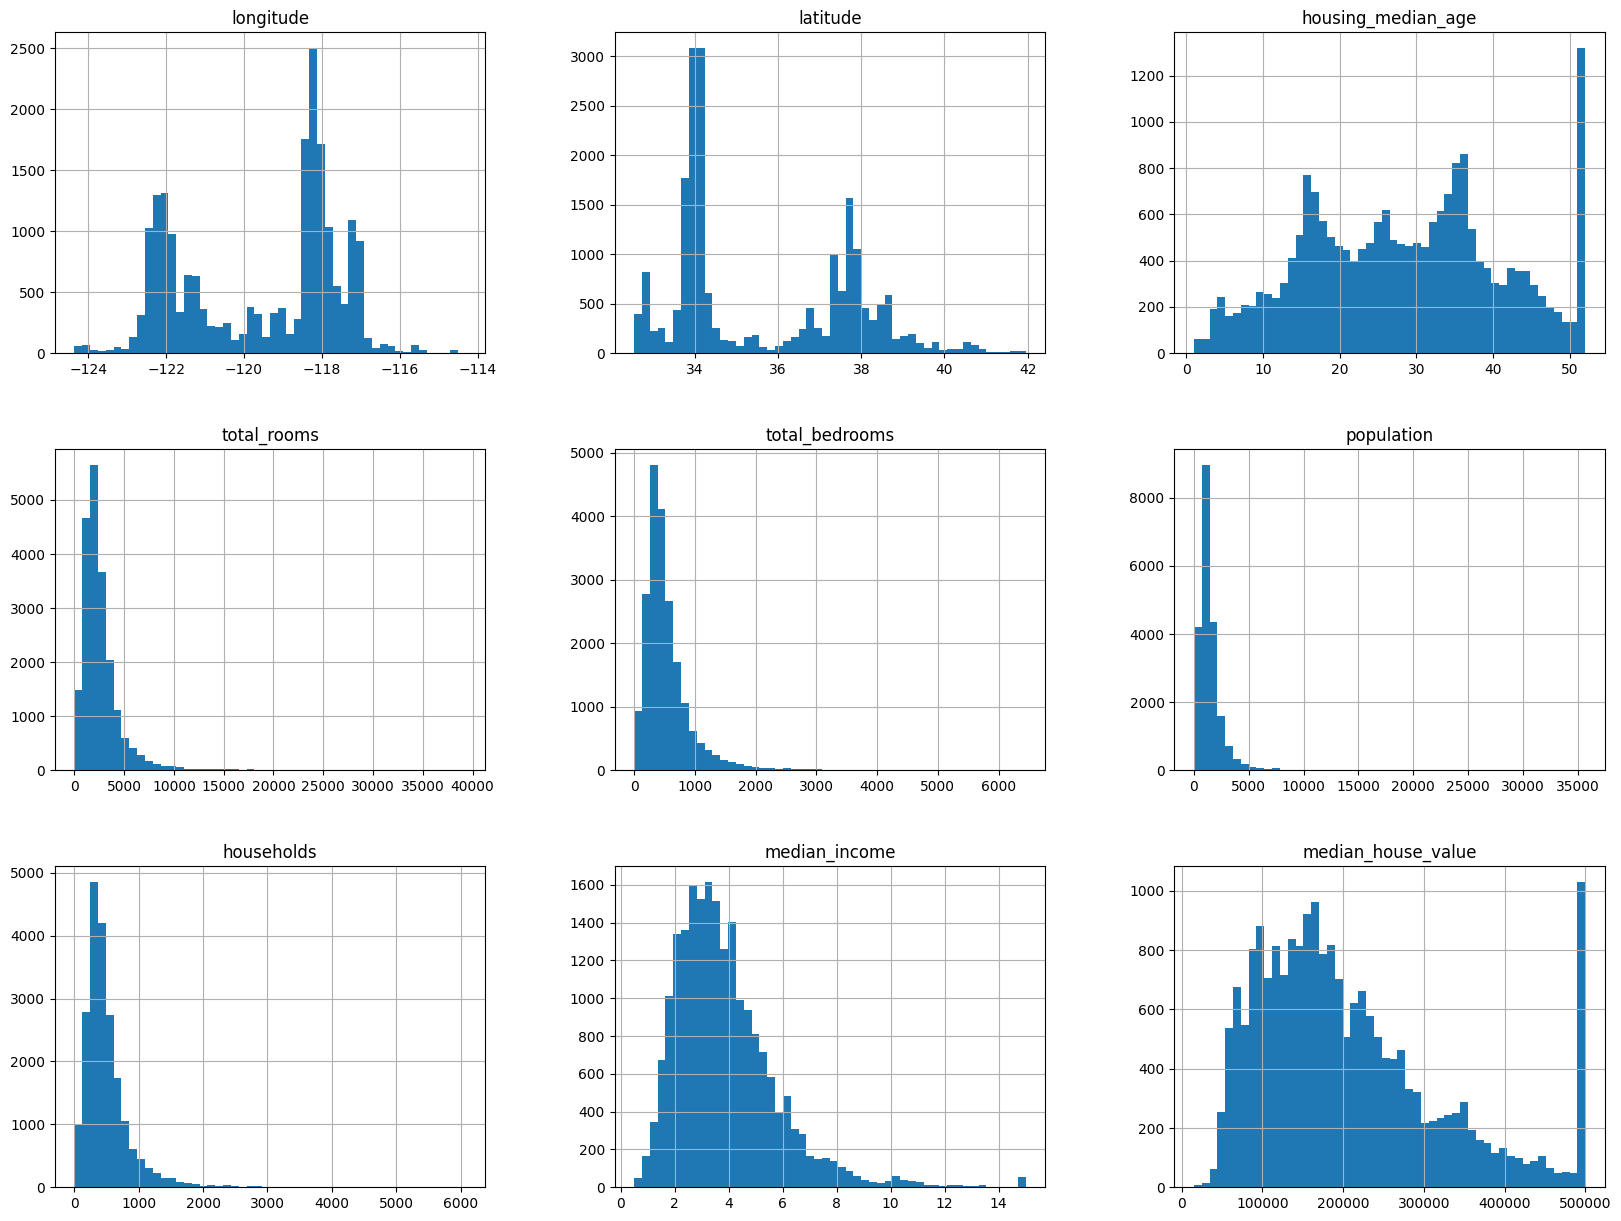

In [8]:
housing.hist(bins=50, figsize=(20,15))
__import__("matplotlib").pyplot.show()

Vertical Axis $\rightarrow$ Number of entries/instances of the value<br>
Horizontal Axis $\rightarrow$ range of values

In [9]:
housing["median_income"]

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20640, dtype: float64

You find out that the median_income is represented in ten thousands of US dollars.<br>
eg: 8 means $80,000

## Making a Test Set and Training Set

In [10]:
# creating a test set (generally 20% of the dataset or even less if dataset is too large)

import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices, train_indices = shuffled_indices[:test_set_size], shuffled_indices[test_set_size:]
    return data.iloc[test_indices], data.iloc[train_indices]

test_set, train_set = split_train_test(housing, 0.2)
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15208,-117.07,33.00,4.0,9153.0,1866.0,3775.0,1698.0,4.9550,241500.0,<1H OCEAN
3362,-120.42,40.38,26.0,1652.0,313.0,762.0,280.0,2.4757,85600.0,INLAND
19590,-120.85,37.57,27.0,819.0,157.0,451.0,150.0,3.4934,193800.0,INLAND
11087,-117.90,33.83,33.0,3065.0,611.0,2204.0,606.0,3.8456,211800.0,<1H OCEAN
1615,-122.11,37.87,33.0,3398.0,500.0,1351.0,457.0,6.5814,314200.0,NEAR BAY


## Break-proofing the split approach

The next time the code is run again, it will choose different set of indices, over time, the model will get to see the whole dataset which is to be avoided.

Solutions:
1. Save test set on first run and load it in subsequent runs
2. Set a random number generator's seed before calling permutation() so it generates same shuffled indices


But both the solutions will break when fetching an updated dataset.

In [11]:
# Best solution

from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2 ** 32

def split_train_test_by_id(data, test_ratio, id_column_name):
    ids = data[id_column_name]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

## Working of the test_set_check

1. the identifier is converted into a 64-bit integer.
2. The crc32 function returns the hash of the 64-bit identifier and it is masked with the highest value of 32 bit integer which is 0xffffffff to truncate it into a 32-bit integer.
3. the test_ratio is multiplied with $2^{32}$ to maintain the scale. 
4. The hash is checked with the test_ratio 

In [12]:
# Add a custom ID column to the dataset since it does not have it

housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [13]:
housing_with_id = housing.reset_index() # adds an index column
housing_with_id

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [14]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

test_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20615,20615,-121.54,39.08,23.0,1076.0,216.0,724.0,197.0,2.3598,57500.0,INLAND
20617,20617,-121.53,39.06,20.0,561.0,109.0,308.0,114.0,3.3021,70800.0,INLAND
20622,20622,-121.44,39.00,20.0,755.0,147.0,457.0,157.0,2.4167,67000.0,INLAND
20626,20626,-121.43,39.18,36.0,1124.0,184.0,504.0,171.0,2.1667,93800.0,INLAND


Same thing can be done with Scikit-Learns train_test_split method:

In [15]:
from sklearn.model_selection import train_test_split

train_test, test_set = train_test_split(housing, test_size=0.2, random_state=42) # the integer 42 is just a convention and nothing else
test_set # run it as many times as you want and the result will be the same (unless you change the random_state)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,263300.0,<1H OCEAN
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,266800.0,NEAR OCEAN
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,500001.0,<1H OCEAN
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,72300.0,INLAND


# Avoiding Sampling Bias

It is important for a model to consider each and every category of an attribute to avoid sampling bias. for example, a survey on population of a country consisting of 55% males and 45% females need to take into consideration of 55 males and 45 females in a 100 people. If the percentages does not represent the whole population of the country, then the survey may be considered as biased.

Suppose the experts told you that the median income is a very important attribute to predict median housing prices.
You should ensure that the test set is representative of the various categories of incomes in the whole dataset.

In [16]:
plt = __import__("matplotlib").pyplot # using matplotlib's pyplot

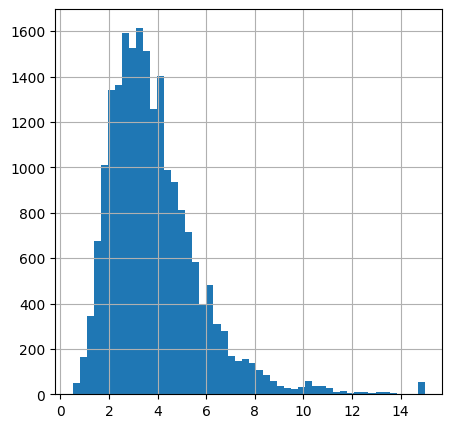

In [17]:
housing["median_income"].hist(figsize=(5, 5), bins=50)

plt.show()

Let's make labels for the median income:<br>
0 - 1.5 $\rightarrow$ 1<br>
1.5 - 3.0 $\rightarrow$ 2<br>
3.0 - 4.5 $\rightarrow$ 3<br>
4.5 - 6.0 $\rightarrow$ 4<br>
6.0 - $\infty$ $\rightarrow$ 5

In [18]:
housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0, 1.5, 3.0, 4.5, 6, np.inf],
    labels=[1, 2, 3, 4, 5]
)

housing[["median_income", "income_cat"]]

,median_income,income_cat
0,8.3252,5
1,8.3014,5
2,7.2574,5
3,5.6431,4
4,3.8462,3
...,...,...
20635,1.5603,2
20636,2.5568,2
20637,1.7000,2
20638,1.8672,2


<Axes: >

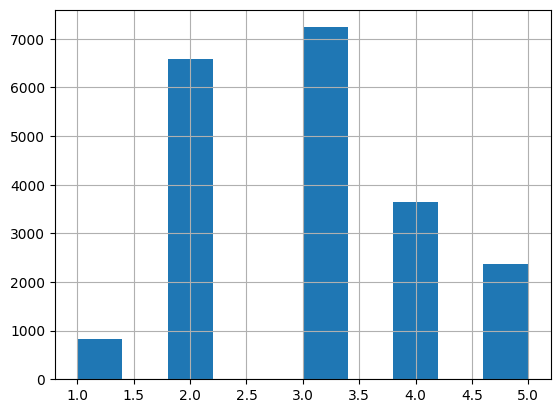

In [19]:
housing["income_cat"].hist()

## Stratified Sampling

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_indexes, test_indexes in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_indexes]
    strat_test_set = housing.loc[test_indexes]

strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,3


In [21]:
# percentage of categories in train set
highest = max([j for _,j in strat_train_set["income_cat"].value_counts().items()])
for i,j in strat_train_set["income_cat"].value_counts().items():
    print(str(i) + ":", str((j/highest)*100) + "%")

3: 100.0%
2: 90.9483503195716%
4: 50.28502332008983%
5: 32.64812575574365%
1: 11.349110381758507%


In [22]:
# percentage of categories in test set
highest = max([j for _,j in strat_test_set["income_cat"].value_counts().items()])
for i,j in strat_test_set["income_cat"].value_counts().items():
    print(str(i) + ":", str((j/highest)*100) + "%")

3: 100.0%
2: 90.94678645473392%
4: 50.310988251554946%
5: 32.61921216309606%
1: 11.402902557014514%


Since both the train set and test set have the same number of categories shuffled randomly, the likelyhood of a Sampling Bias is significantly reduced.

You should remove the income_cat attribute so the data is back to its original state.

In [23]:
# Removing income_cat column
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Visualize the Data

The goal is to go a little more in-depth into understanding of the data. First, make sure the test-set is left aside and only the training set is explored.<br>
<u>Note:</u> If the training set is very large, you may want to sample an exploration set, to make manipulations easy and fast. In this case, the training set is fairly small so you can directly work on the full set.

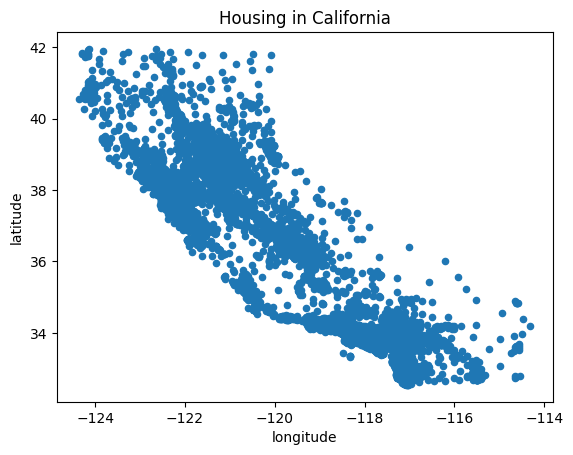

In [24]:
# Plotting latitudes and longitudes to see the location of all districts

housing.plot(kind="scatter", x="longitude", y="latitude")
plt.title("Housing in California")
plt.show()

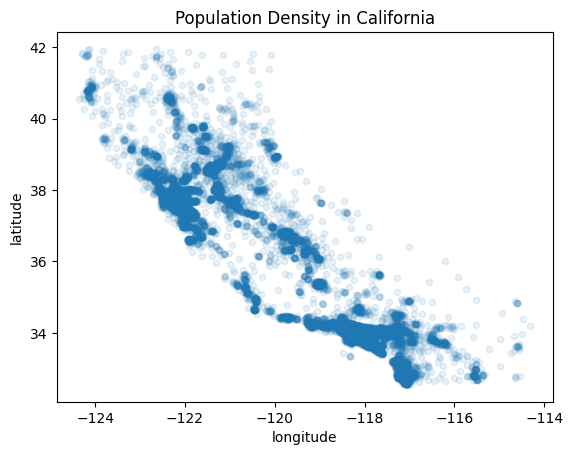

In [25]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.title("Population Density in California")
plt.show()

highly densed areas can now be seen clearly.<br>
Now let's visualize the population of each district in the state. The radius of the circles represents the district's population and the color represents the price (blue meaning more affordable and red being more expensive).

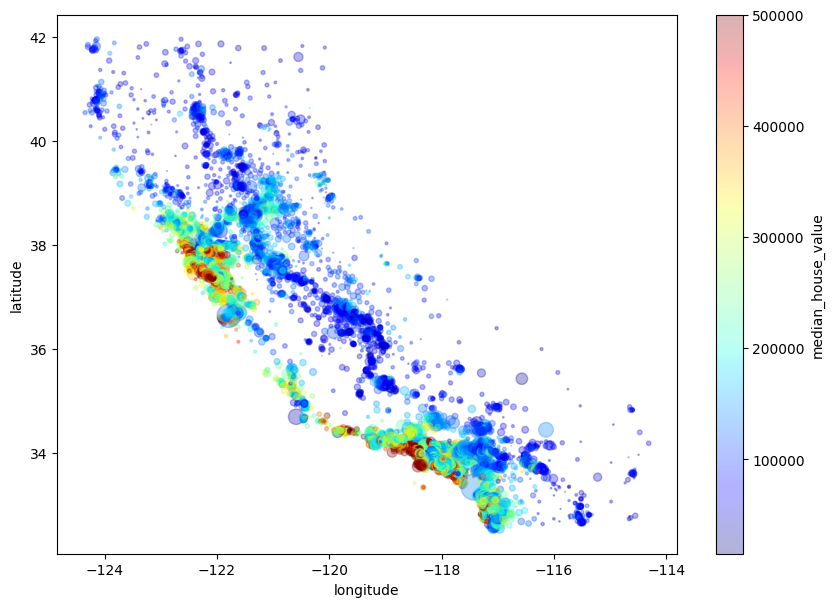

In [26]:
housing.plot(
    kind="scatter",
    alpha=0.3,
    x="longitude",
    y="latitude",
    s=housing["population"]/100,
    c="median_house_value",
    cmap=plt.get_cmap("jet"),
    colorbar=True,
    figsize=(10,7)
)
plt.show()

Takeaways from the graph:<br>
1. The housing prices are related to the location(eg, close to the ocean)
2. The housing prices are related to population density

## Looking for Correlations

We can compute the standard correlation coefficient between every pair of attributes using the corr() method.

In [27]:
# housing_numeric_only = housing.select_dtypes(include=[np.number])
# corr_matrix = housing_numeric_only.corr()
# corr_matrix["median_house_value"].sort_values(ascending=False)

# (or) 

corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

These correlations co-efficients are with respect the the `median_house_value`. For example, the `median_house_value` tends to go up when the `median_income` goes up, because the correlation coefficient between the two is 0.688, which is pretty close to 1 and has a strong positive correlation.<br>
Also, the `median_house_value` tends to go a little up the more you travel to the south because of the negative correlation between `median_house_value` and `latitude`. 

Another way is to use `pandas.plotting.scatter_matrix` function, which plots every numerical attribute against every other numerical attribute. This results in $11^2$ = $121$ correlations and 121 plots which won't fit in the graph. So we will only focus on a few promising attributes that seem most correlated with the `median_house_value`.

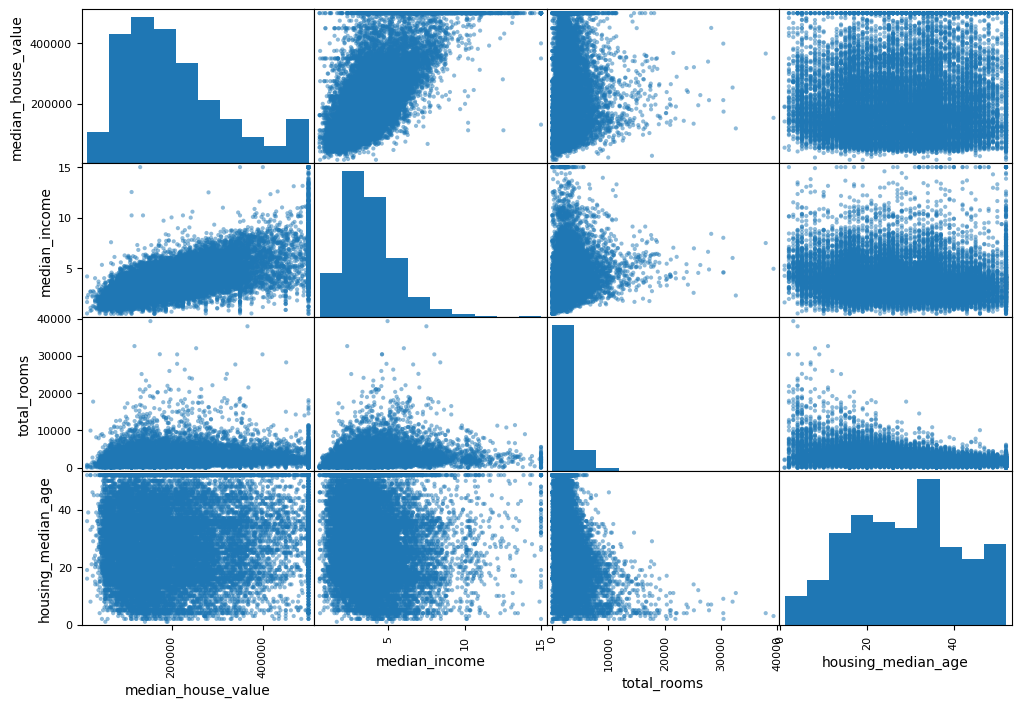

In [28]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

_ = scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

Since the most useful attribute is the `median_income` attribute, we will focus on that.

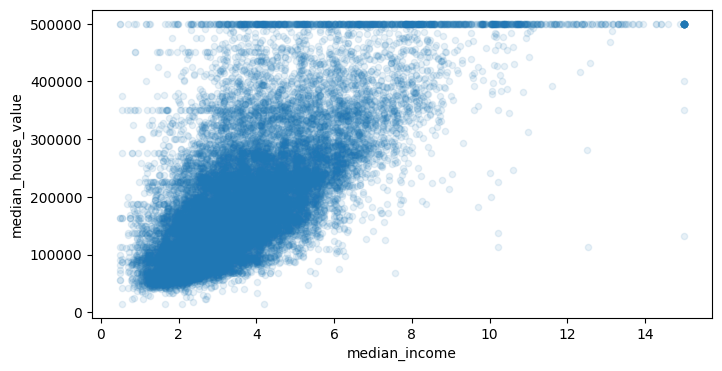

In [29]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, figsize=(8,4))
plt.show()

## Attribute Combinations

So far, we have identified
1. Few data quirks to be cleaned up before feeding it to an ML algorithm
2. correlations between attributes
3. tail-heavy distribution in some attributes

The total number of rooms in a district is not very useful without the number of households in the district. What we really want is the number of rooms per household, not number of rooms per district. The population per household is also an interesting attribute combination to look at.

In [30]:
housing[["households", "total_rooms", "total_bedrooms"]]

,households,total_rooms,total_bedrooms
0,126.0,880.0,129.0
1,1138.0,7099.0,1106.0
2,177.0,1467.0,190.0
3,219.0,1274.0,235.0
4,259.0,1627.0,280.0
...,...,...,...
20635,330.0,1665.0,374.0
20636,114.0,697.0,150.0
20637,433.0,2254.0,485.0
20638,349.0,1860.0,409.0


In [31]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

If we look at the correlation matrix again...

In [32]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

The correlation between `median_house_value` with the attributes like `rooms_per_household` and `bedrooms_per_room` seems to be more informative than the correlation with `total_rooms` or `total_bedrooms`. Apparently the houses with a lower bedroom to room ratio tend to be more expensive. And the house price tends to go up when there are more rooms per household. Obviously the larger the house, more the price.

## Preparing the Data for Machine Learning Algorithms

It is time to __prepare the data__ for your Machine Learning Algorithms. Instead of just doing this manually, writing functions to do the tasks is much more preferred for the following reasons:
1. Reproduce transformations easily on the dataset
2. Gradually build up library of transformation functions that can be reused in future projects
3. The functions can be used in live system to transform the new data before feeding it to your algorithms
4. This will make it possible for you to easily try various transformations and see which combination of transformations work the best.

Let's begin with a clean training set by copying the `strat_train_set` and let's separate the predictors and labels since we don't necessarily want to apply the same transformations to the predictors and the target values.

In [33]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [34]:
housing_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

### Data Cleaning

Most ML Algorithms cannot work with __missing features__. Let's create few functions to take care of them.<br>
We noticed that the `total_bedrooms` attribute has some missing values.

In [35]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [36]:
housing["total_bedrooms"].isna().sum() # number of missing values

158

Option 1: get rid of corresponding districts<br>
Option 2: get rid of the whole attribute<br>
Option 3: Set the values to some value (eg, zero, mean, median etc)

In [37]:
# housing.dropna(subset=["total_bedrooms"]) -> Option 1
# housing.drop("total_bedrooms", axis=1) -> Option 2
# housing["total_bedrooms"].fillna(housing["total_bedrooms"].median(skipna=True), inplace=True) -> Option 3

Scikit-learn provides a handy class to take care of Missing values: `SimpleImputer`.<br>
First create a `SimpleImputer` instance, sppecifying that you want to replace each attribute's missing values with the median of that attribute.

In [38]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

housing_numeric = housing.drop("ocean_proximity", axis=1) # since median can only be computed on numerical attributes

imputer.fit(housing_numeric)

SimpleImputer(strategy='median')

The imputer has simply computed the median of each attribute and stored the results in its `statistics_` instance variable.
Only the `total_bedrooms` attribute had some missing values, but we can't be sure that there won't be any missing values in new data after the system goes live.

In [39]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

Now the "trained" imputer can be used to transform the training set by replacing the missing values by the learned medians.

In [40]:
X = imputer.transform(housing_numeric) # result is a numpy array containing transformed features.
X

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [41]:
housing_tr = pd.DataFrame(X, columns=housing_numeric.columns)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


## Handling Text and Categorical Attributes

In [42]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [43]:
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7277
INLAND             5262
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
Name: count, dtype: int64

Most ML algorithms prefer to work with numbers anyway, so converting these categories from text to numbers will prove to be very useful. We will use Scikit-Learn's `OrdinalEncoder` class.

In [44]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

In [45]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

You can get a list of categories using the categories_ instance variable. 

In [46]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with ML Algorithms is that it will assume two nearby values are more similar than distant values. For cases like "good", "average", "bad", "worst" it's fine, but it is certainly not the case for `ocean_proximity` column. Eg, value categories 0 and 4 are more similar than values 0 and 1.<br>
To fix the issue, we go with the __one-hot encoding__ approach. 

The idea is to create one binary attribute per category: one attribute will be equal to 1 when the category equals "<1H OCEAN" (0 otherwise) and so on. The new attributes are sometimes called _dummy attributes_. Scikit Learn provides a `OneHotEncoder` class to convert categorical values into one-hot vectors. watch this <a href="https://youtube.com/watch?v=rsyrZnZ8J2o"> video </a> to learn more about it.

In [47]:
from sklearn.preprocessing import OneHotEncoder

category_encoder = OneHotEncoder()
housing_cat_1hot = category_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

The output is a Sparse Matrix, instead of a NumPy array. This is very useful when you have categorical attributes with thousands of categories. After one-hot encoding, we get a matrix with thousands of columns, and the matrix is full of zeroes except for a single 1 per row.<br>
Storing tons of memory mostly to store zeroes would be very wasteful, so instead the sparse matrix only stores the location of the non-zero elements. It can be used mostly like a 2-D array, but if you wish to convert it to a dense array, you can use the `toarray()` method to do so.

In [48]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [49]:
category_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

<u>Note:</u><br>
If a categorical attribute has a large number of possible categories (eg, country code, profession, etc) then one-hot encoding might be very expensive on hardware and may slow down the performance. You may want to replace the categorical input with useful numerical features related to categories (eg, replace ocean_proximity with distance to the ocean, replace country code with it's population or gdp per capita). Alternatively, you could replace each category with a learnable low dimensional vector called _embedding_ (available in Chapter 13).

## Custom Transformers

Sometimes you will need to write your own customized Transformers for tasks such as custom cleanup operations or combining specific attributes. Since Scikit Learn relies on Duck Typing (instead of inheritance), all you need to do is implement 3 methods:
1. `fit()`
2. `transform()`
3. `fit_transform()`

For example, here is a custom small transformer that adds combined attributes we discussed earlier:

In [50]:
housing_numeric.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

the indexing for `total_rooms`, `total_bedrooms`, `population` and `households` is 3, 4, 5 and 6 respectively.

In [51]:
housing.values

array([[-121.46, 38.52, 29.0, ..., 706.0, 2.1736, 'INLAND'],
       [-117.23, 33.09, 7.0, ..., 768.0, 6.3373, 'NEAR OCEAN'],
       [-119.04, 35.37, 44.0, ..., 300.0, 2.875, 'INLAND'],
       ...,
       [-122.72, 38.44, 48.0, ..., 172.0, 3.1797, '<1H OCEAN'],
       [-122.7, 38.31, 14.0, ..., 501.0, 4.1964, '<1H OCEAN'],
       [-122.14, 39.97, 27.0, ..., 197.0, 3.1319, 'INLAND']], dtype=object)

In [52]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # add_bedrooms_per_room -> hyperparameter
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X,  rooms_per_household, bedrooms_per_room, population_per_household]
        else:
            return np.c_[X,  rooms_per_household, population_per_household]

    def getColumns(self):
        if self.add_bedrooms_per_room:
            return np.append([i for i in housing.columns], ["rooms_per_household", "bedrooms_per_room", "population_per_household"])
        return np.append([i for i in housing.columns], ["rooms_per_household", "population_per_household"])
    
    
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [53]:
housing_extra_attribs

array([[-121.46, 38.52, 29.0, ..., 'INLAND', 5.485835694050992,
        3.168555240793201],
       [-117.23, 33.09, 7.0, ..., 'NEAR OCEAN', 6.927083333333333,
        2.6236979166666665],
       [-119.04, 35.37, 44.0, ..., 'INLAND', 5.3933333333333335,
        2.223333333333333],
       ...,
       [-122.72, 38.44, 48.0, ..., '<1H OCEAN', 4.1104651162790695,
        2.6627906976744184],
       [-122.7, 38.31, 14.0, ..., '<1H OCEAN', 6.297405189620759,
        2.411177644710579],
       [-122.14, 39.97, 27.0, ..., 'INLAND', 5.477157360406092,
        3.1725888324873095]], dtype=object)

In [54]:
pd.DataFrame(data=housing_extra_attribs, columns=attr_adder.getColumns()).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
4,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


In this example, the transformer has one __Hyperparameter__, `add_bedrooms_per_room`, set to `True` by default. This hyperparameter will allow you to easily find out whether adding this unique attribute helps the ML algorithms or not.<br>
You can add a hyperparameter to gate any data preparation step that you are not 100% sure about.

## Feature Scaling

__Feature Scaling__ is one of the most important transformations to apply to your data. ML Algorithms usually do not perform well when the input numerical attributes have very different scales.<br>
For example, the __total number of rooms__ ranges from $6$ to $39,320$, while the __median incomes__ only range from $0$ to $15$. Note that that scaling the target values is generally not required.


In [55]:
housing["total_rooms"].min(), housing["total_rooms"].max()

(6.0, 39320.0)

In [56]:
housing["median_income"].min(), housing["median_income"].max()

(0.4999, 15.0001)

Two ways to get all attributes to have same scale:
1. Min-Max Scaling / Normalization
2. Standardization

### Min-Max Scaling

Values are shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtracting by the min value and dividing by the max minus the min.

$$
x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}}
$$


There is a scikit-learn transformer called `MinMaxScaler` that let's you do this. It has a `feature_range` hyperparameter that lets you change the range if you don't want 0-1 for some reason.

### Standardization

It subtracts value by the mean value and then divides by the standard deviation. Unlike min-max scaling, standardization does not have bound values to a specific range, which may be a problem for some algorithms (eg, neural networks often expect input value ranging from 0 to 1). However, standardization is much less affected by outliers.<br>

$$
x_{std} = \frac{x - \mu_{X}}{\sigma_{X}}, \forall x \in X
$$

<u><b>Note:</b></u><br>
As with all transformations, it is important to fit the scalers to the training data only, not to the full dataset (including test set). Only then can you use them to transform the training set and the test set (and new data). 

### Problem with Min-Max Scaling and Standardization

Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (for eg, neural networks expect an input value ranging from 0 to 1). However, standardization is much less affected by __outliers__.  for example,

In [57]:
housing["median_income"].mean()

3.875884278100775

In [58]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing[["median_income"]])

scaler.data_min_, housing["median_income"].mean(), scaler.data_max_

(array([0.4999]), 3.875884278100775, array([15.0001]))

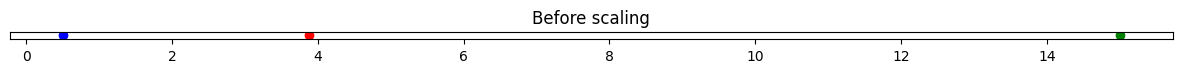

In [59]:
plt.figure(figsize=(15, 0.1))
number_line = np.arange(scaler.data_min_[0], scaler.data_max_[0], (scaler.data_max_[0] - scaler.data_min_[0]) / 10)
plt.plot(number_line, np.zeros_like(number_line), markersize=8, linestyle='')
plt.plot(scaler.data_min_, 0, marker='o', color='blue')
plt.plot(housing["median_income"].mean(), 0, marker='o', color='red')
plt.plot(scaler.data_max_, 0, marker='o', color='green')
plt.yticks([])
plt.title("Before scaling")
plt.show()

<font color="blue"> * </font> = min <br>
<font color="red"> * </font> = mean <br>
<font color="green"> * </font> = max

In [60]:
scaled_median_income = scaler.transform(housing[["median_income"]]).copy()

In [61]:
scaled_median_income

array([[0.11542599],
       [0.40257376],
       [0.16379774],
       ...,
       [0.18481124],
       [0.25492752],
       [0.18151474]])

In [62]:
scaled_median_income.min(), scaled_median_income.mean(), scaled_median_income.max()

(0.0, 0.23282329058225237, 1.0)

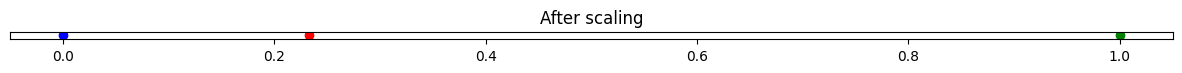

In [63]:
plt.figure(figsize=(15, 0.1))
number_line = np.arange(scaled_median_income.min(), scaled_median_income.max(), (scaled_median_income.max() - scaled_median_income.min()) / 10)
plt.plot(number_line, np.zeros_like(number_line), markersize=8, linestyle='')
plt.plot(scaled_median_income.min(), 0, marker='o', color='blue')
plt.plot(scaled_median_income.mean(), 0, marker='o', color='red')
plt.plot(scaled_median_income.max(), 0, marker='o', color='green')
plt.yticks([])
plt.title("After scaling")
plt.show()

<font color="blue"> * </font> = min <br>
<font color="red"> * </font> = mean <br>
<font color="green"> * </font> = max

In case there was an outlier, say 100 in the `median_income`,

In [64]:
median_income_with_outlier = np.append(housing["median_income"].array, 100.0)
median_income_with_outlier = np.c_[median_income_with_outlier]
median_income_with_outlier

array([[  2.1736],
       [  6.3373],
       [  2.875 ],
       ...,
       [  4.1964],
       [  3.1319],
       [100.    ]])

In [65]:
scaler = MinMaxScaler()
scaler.fit(median_income_with_outlier)
scaled_median_income = scaler.transform(median_income_with_outlier).copy()

# scaled_median_income.len
scaled_median_income.min(), scaled_median_income.mean(), scaled_median_income.max()

(0.0, 0.03398795976837012, 0.9999999999999999)

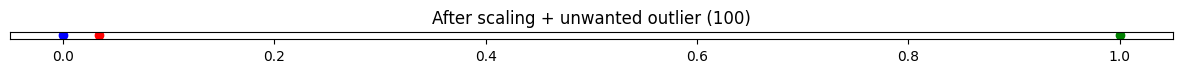

In [66]:
plt.figure(figsize=(15, 0.1))
number_line = np.arange(scaled_median_income.min(), scaled_median_income.max(), (scaled_median_income.max() - scaled_median_income.min()) / 10)
plt.plot(number_line, np.zeros_like(number_line), markersize=8, linestyle='')
plt.plot(scaled_median_income.min(), 0, marker='o', color='blue')
plt.plot(scaled_median_income.mean(), 0, marker='o', color='red')
plt.plot(scaled_median_income.max(), 0, marker='o', color='green')
plt.yticks([])
plt.title("After scaling + unwanted outlier (100)")
plt.show()

From the above 3 plots,

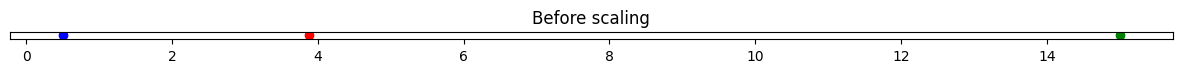
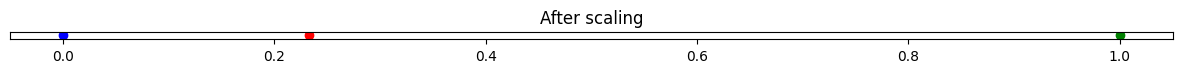
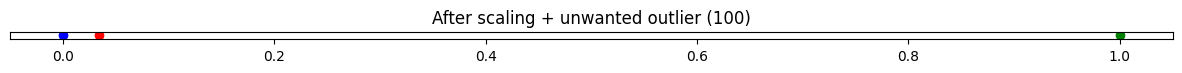

<font color="blue"> * </font> = min <br>
<font color="red"> * </font> = mean <br>
<font color="green"> * </font> = max

The min-max scaling crushes all the other values from 0-15 down to 0-0.15 which is to be avoided. Outliers must be dealt with when transforming them through min-max scaling.

## Transformation Pipelines

As we saw before, there are many _data transformation_ steps that need to be executed in the right order. Fortunately, Scikit-Learn provides the `Pipeline` class to help with such sequences of transformations. Here is an example,

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # replaces null values of each attribute to its computed median
    ('attribs_adder', CombinedAttributesAdder()), # adds additional attributes (rooms_per_household, bedrooms_per_room, etc)
    ('std_scaler', StandardScaler()) # Standardizes values
])

housing_num_tr = num_pipeline.fit_transform(housing_numeric)


The `Pipeline` constructor takes a list of name/estimator pairs defining a sequence of steps. All but the last estimator must be transformers (i.e, they must have a `fit_transform()` method). The names can be anything you like (as long as they are unique and they do not contain double underscores "__"): they will come in handy later for hyperparameter tuning.

When you call `fit()` method on the `Pipeline` object, it calls `fit_transform()` sequentially on all transformers, passing the output of each call as the parameter to the next call, until it reaches the final estimator, for which it just calls the `fit()` method.

We have handled the _categorical columns_ and the _numerical columns_ separately. It would be far more convenient to have a single transformer able to handle all columns, applying the appropriate transformations to each column. Scikit-Learn has the `ColumnTransformer` for this purpose, and it works very well with Pandas Dataframes.

In [ ]:
from sklearn.compose import ColumnTransformer 

numeric_attributes = list(housing_numeric)
categorical_attributes = ["ocean_proximity"]


full_pipeline = ColumnTransformer([
    ("num", num_pipeline, numeric_attributes),
    ("cat", OneHotEncoder(), categorical_attributes)
])

housing_prepared = full_pipeline.fit_transform(housing)